In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [ ]:
df_DA=pd.read_csv('DataAnalyst.csv')
df_DA

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\r\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),-1,True
1,1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\r\n\r\nProvides analytical and techni...,3.8,Visiting Nurse Service of New York\r\n3.8,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,-1
2,2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\r\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,-1
3,3,Data Analyst,$37K-$66K (Glassdoor est.),Requisition NumberRR-0001939\r\nRemote:Yes\r\n...,4.1,Celerity\r\n4.1,"New York, NY","McLean, VA",201 to 500 employees,2002,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),-1,-1
4,4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),ABOUT FANDUEL GROUP\r\n\r\nFanDuel Group is a ...,3.9,FanDuel\r\n3.9,"New York, NY","New York, NY",501 to 1000 employees,2009,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2248,2248,RQS - IHHA - 201900004460 -1q Data Security An...,$78K-$104K (Glassdoor est.),Maintains systems to protect data from unautho...,2.5,"Avacend, Inc.\r\n2.5","Denver, CO","Alpharetta, GA",51 to 200 employees,-1,Company - Private,Staffing & Outsourcing,Business Services,Unknown / Non-Applicable,-1,-1
2249,2249,Senior Data Analyst (Corporate Audit),$78K-$104K (Glassdoor est.),Position:\r\nSenior Data Analyst (Corporate Au...,2.9,Arrow Electronics\r\n2.9,"Centennial, CO","Centennial, CO",10000+ employees,1935,Company - Public,Wholesale,Business Services,$10+ billion (USD),"Avnet, Ingram Micro, Tech Data",-1
2250,2250,"Technical Business Analyst (SQL, Data analytic...",$78K-$104K (Glassdoor est.),"Title: Technical Business Analyst (SQL, Data a...",-1.0,Spiceorb,"Denver, CO",-1,-1,-1,-1,-1,-1,-1,-1,-1
2251,2251,"Data Analyst 3, Customer Experience",$78K-$104K (Glassdoor est.),Summary\r\n\r\nResponsible for working cross-f...,3.1,Contingent Network Services\r\n3.1,"Centennial, CO","West Chester, OH",201 to 500 employees,1984,Company - Private,Enterprise Software & Network Solutions,Information Technology,$25 to $50 million (USD),-1,-1


In [ ]:
df_DA = df_DA.rename(columns={'Job Title': 'Job_Title', 'Salary Estimate': 'Salary_Estimate', 'Job Description': 'Job_Description', 'Company Name': 'Company_Name', 'Type of ownership': 'Type_of_ownership', 'Easy Apply': 'Easy_Apply','Analyst Job': 'Analyst_Job'})
df_DA.head()

,Unnamed: 0,Job_Title,Salary_Estimate,Job_Description,Rating,Company_Name,Location,Headquarters,Size,Founded,Type_of_ownership,Industry,Sector,Revenue,Competitors,Easy_Apply
0,0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\r\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),-1,True
1,1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\r\n\r\nProvides analytical and techni...,3.8,Visiting Nurse Service of New York\r\n3.8,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,-1
2,2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\r\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,-1
3,3,Data Analyst,$37K-$66K (Glassdoor est.),Requisition NumberRR-0001939\r\nRemote:Yes\r\n...,4.1,Celerity\r\n4.1,"New York, NY","McLean, VA",201 to 500 employees,2002,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),-1,-1
4,4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),ABOUT FANDUEL GROUP\r\n\r\nFanDuel Group is a ...,3.9,FanDuel\r\n3.9,"New York, NY","New York, NY",501 to 1000 employees,2009,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,True


In [ ]:
df_DA = df_DA.drop(['Unnamed: 0','Headquarters'],axis=1)

In [ ]:
null_columns=df_DA.columns[df_DA.isnull().any()]
df_DA[null_columns].isnull().sum()

Company_Name    1
dtype: int64

In [ ]:
print(df_DA[df_DA["Company_Name"].isnull()][null_columns])

     Company_Name
1860          NaN


In [ ]:
df_DA.dropna(how="any",inplace=True)

In [ ]:
null_columns=df_DA.columns[df_DA.isnull().any()]
df_DA[null_columns].isnull().sum()

Series([], dtype: float64)

In [ ]:
df_DA.dtypes

Job_Title             object
Salary_Estimate       object
Job_Description       object
Rating               float64
Company_Name          object
Location              object
Size                  object
Founded                int64
Type_of_ownership     object
Industry              object
Sector                object
Revenue               object
Competitors           object
Easy_Apply            object
dtype: object

In [ ]:
df_DA['Job_Title'],df_DA['Department']= df_DA['Job_Title'].str.split(',',1).str

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  """Entry point for launching an IPython kernel.


In [ ]:
df_DA['Company_Name'],_ = df_DA['Company_Name'].str.split('\n',1).str
df_DA['Salary_Estimate'],_= df_DA['Salary_Estimate'].str.split('(',1).str
df_DA['Min_Salary'],df_DA['Max_Salary']= df_DA['Salary_Estimate'].str.split('-').str

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
clean_salary = lambda x: x.replace('', np.nan).str.strip().str.lstrip('$').str.rstrip('K').fillna(0).astype(int)

In [ ]:
df_DA['Min_Salary'] = clean_salary(df_DA['Min_Salary'])
df_DA['Max_Salary'] = clean_salary(df_DA['Max_Salary'])
# df_DA["Salary_Estimate"] = clean_salary(df_DA['Salary_Estimate'])

df_DA = df_DA.drop(['Salary_Estimate'],axis = 1)

df_DA.head()

,Job_Title,Job_Description,Rating,Company_Name,Location,Size,Founded,Type_of_ownership,Industry,Sector,Revenue,Competitors,Easy_Apply,Department,Min_Salary,Max_Salary
0,Data Analyst,Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\r,"New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),-1,True,Center on Immigration and Justice (CIJ),37,66
1,Quality Data Analyst,Overview\r\n\r\nProvides analytical and techni...,3.8,Visiting Nurse Service of New York\r,"New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,-1,NaN,37,66
2,Senior Data Analyst,We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\r,"New York, NY",1001 to 5000 employees,2003,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,-1,Insights & Analytics Team [Customer Operations],37,66
3,Data Analyst,Requisition NumberRR-0001939\r\nRemote:Yes\r\n...,4.1,Celerity\r,"New York, NY",201 to 500 employees,2002,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),-1,-1,NaN,37,66
4,Reporting Data Analyst,ABOUT FANDUEL GROUP\r\n\r\nFanDuel Group is a ...,3.9,FanDuel\r,"New York, NY",501 to 1000 employees,2009,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,True,NaN,37,66


In [ ]:
new_column = []

def word_search(column):
    for element in column:
        my_list = element.split()
        if 'Senior' in my_list:
            new_column.append('True')
        elif "Sr." in my_list:
            new_column.append("True")
        else:
            new_column.append('False')

In [ ]:
word_search(df_DA["Job_Title"])

In [ ]:
len(df_DA)

2252

In [ ]:
len(new_column)

2252

In [ ]:
df_DA["Senior_Job"] = new_column

In [ ]:
df_DA.head()

,Job_Title,Job_Description,Rating,Company_Name,Location,Size,Founded,Type_of_ownership,Industry,Sector,Revenue,Competitors,Easy_Apply,Department,Min_Salary,Max_Salary,Senior_Job
0,Data Analyst,Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\r,"New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),-1,True,Center on Immigration and Justice (CIJ),37,66,False
1,Quality Data Analyst,Overview\r\n\r\nProvides analytical and techni...,3.8,Visiting Nurse Service of New York\r,"New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,-1,NaN,37,66,False
2,Senior Data Analyst,We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\r,"New York, NY",1001 to 5000 employees,2003,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,-1,Insights & Analytics Team [Customer Operations],37,66,True
3,Data Analyst,Requisition NumberRR-0001939\r\nRemote:Yes\r\n...,4.1,Celerity\r,"New York, NY",201 to 500 employees,2002,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),-1,-1,NaN,37,66,False
4,Reporting Data Analyst,ABOUT FANDUEL GROUP\r\n\r\nFanDuel Group is a ...,3.9,FanDuel\r,"New York, NY",501 to 1000 employees,2009,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,True,NaN,37,66,False


In [ ]:
job_list = df_DA['Job_Title'].value_counts()
full_job_list = list(job_list)

[]

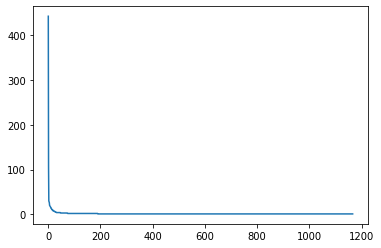

In [ ]:
import matplotlib.pyplot as plt
plt.plot(full_job_list)

plt.plot()

In [ ]:
replace_application = (job_list[job_list < 17].index)

# Replace in dataframe
for app in replace_application:
    df_DA['Job_Title'] = df_DA['Job_Title'].replace(app,"Other")
    
# Check to make sure binning was successful
df_DA['Job_Title'].value_counts()

Other                    1547
Data Analyst              442
Senior Data Analyst       105
Junior Data Analyst        30
Business Data Analyst      28
Sr. Data Analyst           26
Data Analyst II            20
Lead Data Analyst          19
Data Quality Analyst       18
Data Analyst Junior        17
Name: Job_Title, dtype: int64

In [ ]:
salary_column = []

def sal_search(column):
    for element in column:
        if element > 100:
            salary_column.append("High")
        elif element > 75:
            salary_column.append("Medium")
        else:
            salary_column.append("Low")

In [ ]:
sal_search(df_DA["Max_Salary"])

In [ ]:
len(df_DA)

2252

In [ ]:
len(salary_column)

2252

In [ ]:
df_DA["Salary_Lvl"] = salary_column

In [ ]:
df_DA

,Job_Title,Job_Description,Rating,Company_Name,Location,Size,Founded,Type_of_ownership,Industry,Sector,Revenue,Competitors,Easy_Apply,Department,Min_Salary,Max_Salary,Senior_Job,Salary_Lvl
0,Data Analyst,Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\r,"New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),-1,True,Center on Immigration and Justice (CIJ),37,66,False,Low
1,Other,Overview\r\n\r\nProvides analytical and techni...,3.8,Visiting Nurse Service of New York\r,"New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,-1,NaN,37,66,False,Low
2,Senior Data Analyst,We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\r,"New York, NY",1001 to 5000 employees,2003,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,-1,Insights & Analytics Team [Customer Operations],37,66,True,Low
3,Data Analyst,Requisition NumberRR-0001939\r\nRemote:Yes\r\n...,4.1,Celerity\r,"New York, NY",201 to 500 employees,2002,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),-1,-1,NaN,37,66,False,Low
4,Other,ABOUT FANDUEL GROUP\r\n\r\nFanDuel Group is a ...,3.9,FanDuel\r,"New York, NY",501 to 1000 employees,2009,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,True,NaN,37,66,False,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2248,Other,Maintains systems to protect data from unautho...,2.5,"Avacend, Inc.\r","Denver, CO",51 to 200 employees,-1,Company - Private,Staffing & Outsourcing,Business Services,Unknown / Non-Applicable,-1,-1,NaN,78,104,False,High
2249,Other,Position:\r\nSenior Data Analyst (Corporate Au...,2.9,Arrow Electronics\r,"Centennial, CO",10000+ employees,1935,Company - Public,Wholesale,Business Services,$10+ billion (USD),"Avnet, Ingram Micro, Tech Data",-1,NaN,78,104,True,High
2250,Other,"Title: Technical Business Analyst (SQL, Data a...",-1.0,Spiceorb,"Denver, CO",-1,-1,-1,-1,-1,-1,-1,-1,"Data analytics, ETL)",78,104,False,High
2251,Other,Summary\r\n\r\nResponsible for working cross-f...,3.1,Contingent Network Services\r,"Centennial, CO",201 to 500 employees,1984,Company - Private,Enterprise Software & Network Solutions,Information Technology,$25 to $50 million (USD),-1,-1,Customer Experience,78,104,False,High


In [ ]:
df_DA.replace(to_replace="-1", value=np.nan, inplace=True)

In [ ]:
df_DA.replace(to_replace=-1, value=np.nan, inplace=True)

In [ ]:
df_DA

,Job_Title,Job_Description,Rating,Company_Name,Location,Size,Founded,Type_of_ownership,Industry,Sector,Revenue,Competitors,Easy_Apply,Department,Min_Salary,Max_Salary,Senior_Job,Salary_Lvl
0,Data Analyst,Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\r,"New York, NY",201 to 500 employees,1961.0,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),NaN,True,Center on Immigration and Justice (CIJ),37,66,False,Low
1,Other,Overview\r\n\r\nProvides analytical and techni...,3.8,Visiting Nurse Service of New York\r,"New York, NY",10000+ employees,1893.0,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),NaN,NaN,NaN,37,66,False,Low
2,Senior Data Analyst,We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\r,"New York, NY",1001 to 5000 employees,2003.0,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,NaN,Insights & Analytics Team [Customer Operations],37,66,True,Low
3,Data Analyst,Requisition NumberRR-0001939\r\nRemote:Yes\r\n...,4.1,Celerity\r,"New York, NY",201 to 500 employees,2002.0,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),NaN,NaN,NaN,37,66,False,Low
4,Other,ABOUT FANDUEL GROUP\r\n\r\nFanDuel Group is a ...,3.9,FanDuel\r,"New York, NY",501 to 1000 employees,2009.0,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,True,NaN,37,66,False,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2248,Other,Maintains systems to protect data from unautho...,2.5,"Avacend, Inc.\r","Denver, CO",51 to 200 employees,NaN,Company - Private,Staffing & Outsourcing,Business Services,Unknown / Non-Applicable,NaN,NaN,NaN,78,104,False,High
2249,Other,Position:\r\nSenior Data Analyst (Corporate Au...,2.9,Arrow Electronics\r,"Centennial, CO",10000+ employees,1935.0,Company - Public,Wholesale,Business Services,$10+ billion (USD),"Avnet, Ingram Micro, Tech Data",NaN,NaN,78,104,True,High
2250,Other,"Title: Technical Business Analyst (SQL, Data a...",NaN,Spiceorb,"Denver, CO",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Data analytics, ETL)",78,104,False,High
2251,Other,Summary\r\n\r\nResponsible for working cross-f...,3.1,Contingent Network Services\r,"Centennial, CO",201 to 500 employees,1984.0,Company - Private,Enterprise Software & Network Solutions,Information Technology,$25 to $50 million (USD),NaN,NaN,Customer Experience,78,104,False,High


In [ ]:
df_DA["Revenue"].unique()

array(['$100 to $500 million (USD)', '$2 to $5 billion (USD)',
       'Unknown / Non-Applicable', '$50 to $100 million (USD)',
       '$1 to $2 billion (USD)', '$5 to $10 billion (USD)',
       '$1 to $5 million (USD)', '$25 to $50 million (USD)',
       '$10+ billion (USD)', 'Less than $1 million (USD)',
       '$10 to $25 million (USD)', nan,
       '$500 million to $1 billion (USD)', '$5 to $10 million (USD)'],
      dtype=object)

In [ ]:
df_DA["Size"].unique()

array(['201 to 500 employees', '10000+ employees',
       '1001 to 5000 employees', '501 to 1000 employees',
       '5001 to 10000 employees', '1 to 50 employees',
       '51 to 200 employees', 'Unknown', nan], dtype=object)

In [ ]:
def recode(column, new_code):
    col_cod = pd.Series(column, copy = True)
    for key, values in new_code.items():
        col_cod.replace(key, values, inplace = True)
    return col_cod

In [ ]:
df_DA['Easy_Apply'] = recode(df_DA['Easy_Apply'],{np.NaN:0,'True':1})


df_easy_apply = df_DA[df_DA['Easy_Apply'] == 1]
df_easy_apply.reset_index()
df_easy_apply.head()

,Job_Title,Job_Description,Rating,Company_Name,Location,Size,Founded,Type_of_ownership,Industry,Sector,Revenue,Competitors,Easy_Apply,Department,Min_Salary,Max_Salary,Senior_Job,Salary_Lvl
0,Data Analyst,Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\r,"New York, NY",201 to 500 employees,1961.0,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),NaN,1,Center on Immigration and Justice (CIJ),37,66,False,Low
4,Other,ABOUT FANDUEL GROUP\r\n\r\nFanDuel Group is a ...,3.9,FanDuel\r,"New York, NY",501 to 1000 employees,2009.0,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,1,NaN,37,66,False,Low
7,Other,Data Science Analyst\r\n\r\nJob Details\r\nLev...,3.7,GNY Insurance Companies\r,"New York, NY",201 to 500 employees,1914.0,Company - Private,Insurance Carriers,Insurance,$100 to $500 million (USD),"Travelers, Chubb, Crum & Forster",1,NaN,37,66,False,Low
13,Senior Data Analyst,About Known\r\n\r\nKnown is a modern marketing...,3.0,Known\r,"New York, NY",201 to 500 employees,2004.0,Company - Private,Advertising & Marketing,Business Services,$100 to $500 million (USD),NaN,1,NaN,37,66,True,Low
16,Data Analyst,Undertone stands alone among AdTech and ad net...,3.8,Undertone\r,"New York, NY",201 to 500 employees,2001.0,Subsidiary or Business Segment,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"DoubleClick, Specific Media, Collective",1,NaN,37,66,False,Low


In [ ]:
df_DA

,Job_Title,Job_Description,Rating,Company_Name,Location,Size,Founded,Type_of_ownership,Industry,Sector,Revenue,Competitors,Easy_Apply,Department,Min_Salary,Max_Salary,Senior_Job,Salary_Lvl
0,Data Analyst,Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\r,"New York, NY",201 to 500 employees,1961.0,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),NaN,1,Center on Immigration and Justice (CIJ),37,66,False,Low
1,Other,Overview\r\n\r\nProvides analytical and techni...,3.8,Visiting Nurse Service of New York\r,"New York, NY",10000+ employees,1893.0,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),NaN,0,NaN,37,66,False,Low
2,Senior Data Analyst,We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\r,"New York, NY",1001 to 5000 employees,2003.0,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,0,Insights & Analytics Team [Customer Operations],37,66,True,Low
3,Data Analyst,Requisition NumberRR-0001939\r\nRemote:Yes\r\n...,4.1,Celerity\r,"New York, NY",201 to 500 employees,2002.0,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),NaN,0,NaN,37,66,False,Low
4,Other,ABOUT FANDUEL GROUP\r\n\r\nFanDuel Group is a ...,3.9,FanDuel\r,"New York, NY",501 to 1000 employees,2009.0,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,1,NaN,37,66,False,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2248,Other,Maintains systems to protect data from unautho...,2.5,"Avacend, Inc.\r","Denver, CO",51 to 200 employees,NaN,Company - Private,Staffing & Outsourcing,Business Services,Unknown / Non-Applicable,NaN,0,NaN,78,104,False,High
2249,Other,Position:\r\nSenior Data Analyst (Corporate Au...,2.9,Arrow Electronics\r,"Centennial, CO",10000+ employees,1935.0,Company - Public,Wholesale,Business Services,$10+ billion (USD),"Avnet, Ingram Micro, Tech Data",0,NaN,78,104,True,High
2250,Other,"Title: Technical Business Analyst (SQL, Data a...",NaN,Spiceorb,"Denver, CO",NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,"Data analytics, ETL)",78,104,False,High
2251,Other,Summary\r\n\r\nResponsible for working cross-f...,3.1,Contingent Network Services\r,"Centennial, CO",201 to 500 employees,1984.0,Company - Private,Enterprise Software & Network Solutions,Information Technology,$25 to $50 million (USD),NaN,0,Customer Experience,78,104,False,High


In [ ]:
df_employed = df_DA['Size'].value_counts().to_frame().reset_index()
df_employed

,index,Size
0,51 to 200 employees,421
1,10000+ employees,375
2,1001 to 5000 employees,348
3,1 to 50 employees,347
4,201 to 500 employees,249
5,501 to 1000 employees,211
6,-1,163
7,5001 to 10000 employees,97
8,Unknown,42


In [ ]:
#df.DA to csv file - export to csv file first  OR START CHARTS and ANALYSIS FROM HERE  


In [ ]:
df_DA['Job Description']


KeyError: ignored